In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Twitter_Data.csv")

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.shape

(162980, 2)

In [5]:
df.isnull().sum()


clean_text    4
category      7
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.shape

(162969, 2)

In [8]:
df.dtypes


clean_text     object
category      float64
dtype: object

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# !pip install emoji
import emoji

def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove hashtags (#hashtag) but keep the word
    text = re.sub(r'#', '', text)

    # 5. Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # 6. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 7. Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # 8. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [16]:
df['clean_text'].apply(clean_text)

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi welcome bjp to...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these crores paid neerav modi not recovere...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object

In [17]:
data = pd.read_csv('tweets.csv')

In [19]:
data['Text'].tail().apply(clean_text)

35                          applovin ceo uses grok
36                                         amazing
37    congratulations scott ainsworth of green bay
38                                            true
39                            we got a ringer here
Name: Text, dtype: object

In [20]:
data['Text'].tail()

35    AppLovin CEO uses Grok 3 https://t.co/aBUxHSs1XW
36                                             Amazing
37      Congratulations, Scott Ainsworth of Green Bay!
38                        True https://t.co/DWUadoe6mQ
39      @DefiantLs We got a ringer here! @IfindRetards
Name: Text, dtype: object

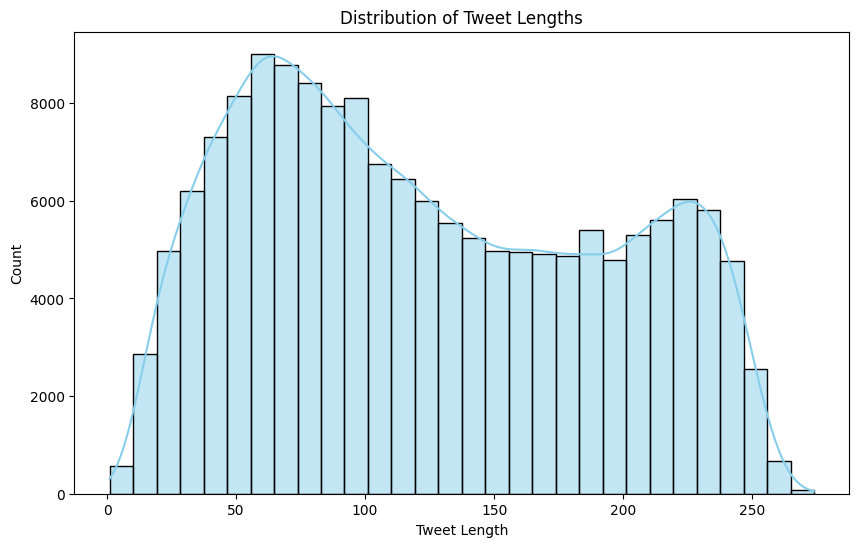

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df["Text_len"] = df["clean_text"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df["Text_len"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()


In [26]:
df

,clean_text,category,Text_len
0,when modi promised “minimum government maximum...,-1.0,210
1,talk all the nonsense and continue all the dra...,0.0,68
2,what did just say vote for modi welcome bjp t...,1.0,117
3,asking his supporters prefix chowkidar their n...,1.0,212
4,answer who among these the most powerful world...,1.0,81
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,108
162976,dear rss terrorist payal gawar what about modi...,-1.0,248
162977,did you cover her interaction forum where she ...,0.0,51
162978,there big project came into india modi dream p...,0.0,77


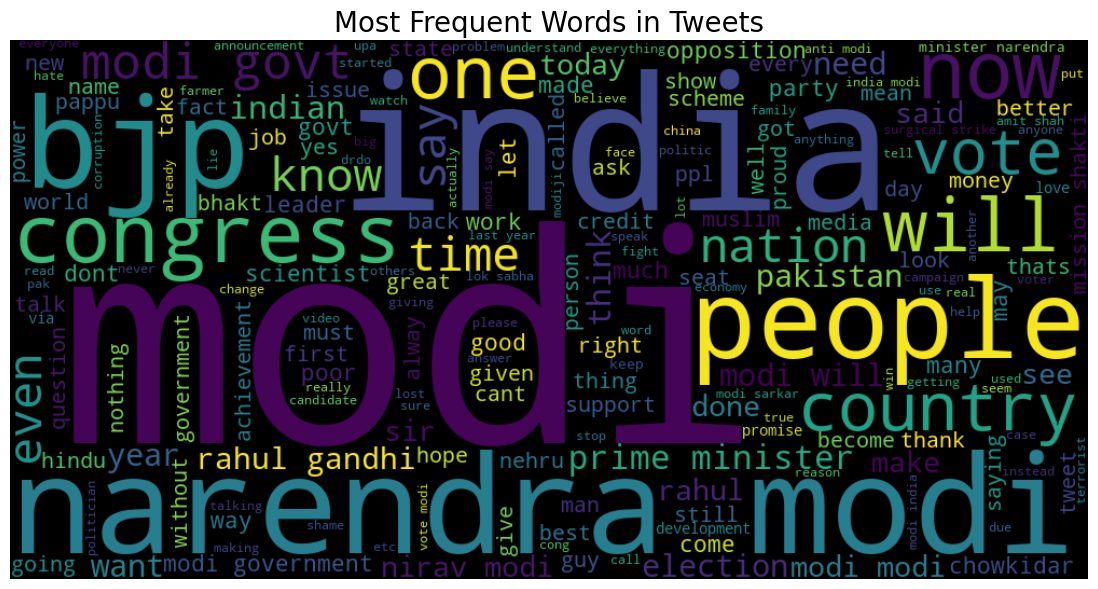

In [32]:
all_words = ' '.join(df["clean_text"].tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Tweets", fontsize=20)
plt.show()
